## Import Libraries

In [392]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import parallel_coordinates

from sklearn import metrics

%matplotlib inline

In [393]:
df = pd.read_csv("allregoion.csv" , index_col=0)

In [394]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming df is your DataFrame and it includes columns like Price, Rating, and various amenities

# Step 1: Feature Engineering

# Weighted Features
df['Weighted_Price'] = df['Price'] * 2  # Giving more weight to Price
df['Weighted_Rating'] = df['Rating'] * 2  # Giving more weight to Rating

# Custom Scoring System: Luxury Score
premium_amenities = ['Spa', 'Wellness_Centre', 'Swimming_Pool', 'Fitness_Centre']
df['Luxury_Score'] = df['Weighted_Price'] + df['Weighted_Rating'] + df[premium_amenities].sum(axis=1) * 1.5

# Custom Scoring System: Satisfaction Score
service_amenities = ['Room_Service', 'Facilities', 'Airport_Shuttle']
df['Satisfaction_Score'] = df['Rating'] * 2 + df[service_amenities].sum(axis=1)

## selection features

In [395]:
features = ['Luxury_Score', 'Satisfaction_Score']


### Normalize

In [396]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

### elbow

In [397]:
# Step 3: Compute WCSS for different numbers of clusters
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

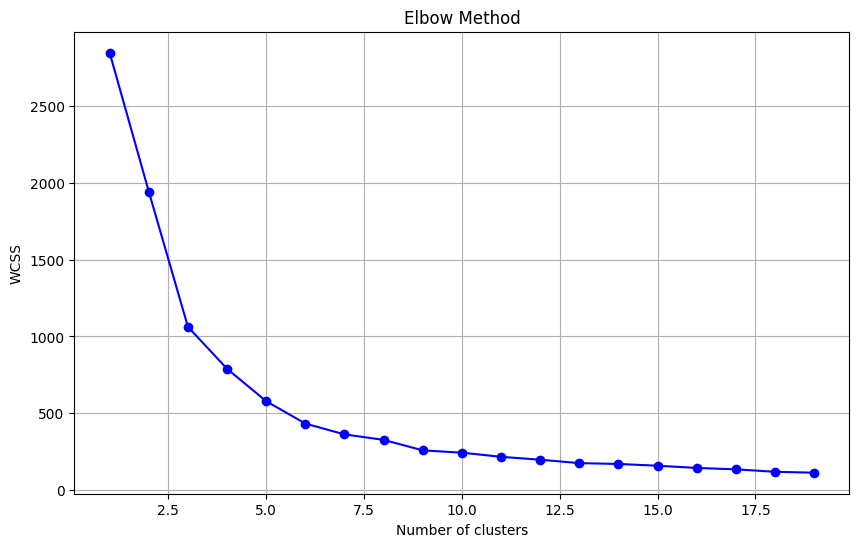

In [398]:
# Step 4: Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### Build a Model

In [399]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [400]:
# Calculate total counts per cluster for each amenity
amenities_columns = ['Airport_Shuttle', 'Business_Centre', 'Facilities', 'Fitness_Centre',
                     'Restaurant', 'Room_Service', 'Spa', 'Swimming_Pool', 'Wellness_Centre']
amenities_sum = df.groupby('Cluster')[amenities_columns].sum()

In [401]:
# Normalize by the total number of hotels in each cluster
cluster_sizes = df['Cluster'].value_counts().sort_index()
amenities_normalized = amenities_sum.div(cluster_sizes, axis=0)

### Charts 

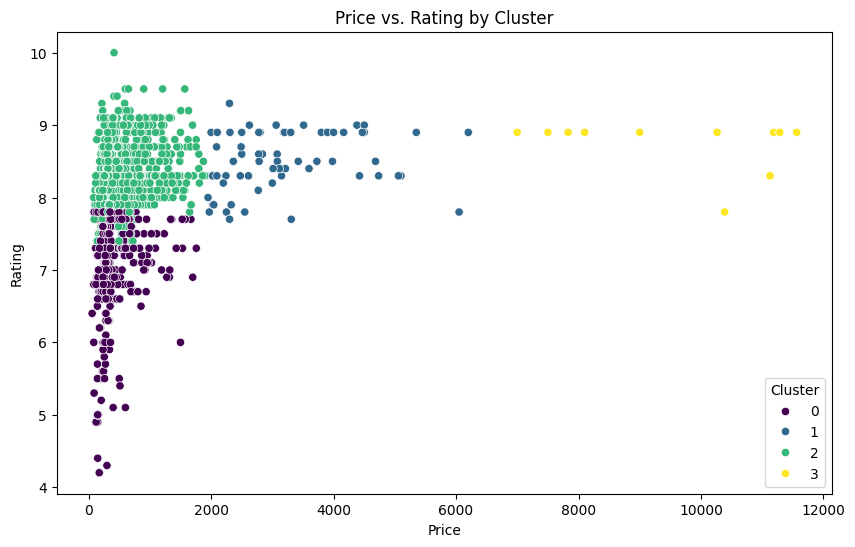

In [402]:
# Scatter Plot of Price vs. Rating by Cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Rating', hue='Cluster', data=df, palette='viridis')
plt.title('Price vs. Rating by Cluster')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.legend(title='Cluster')
plt.show()

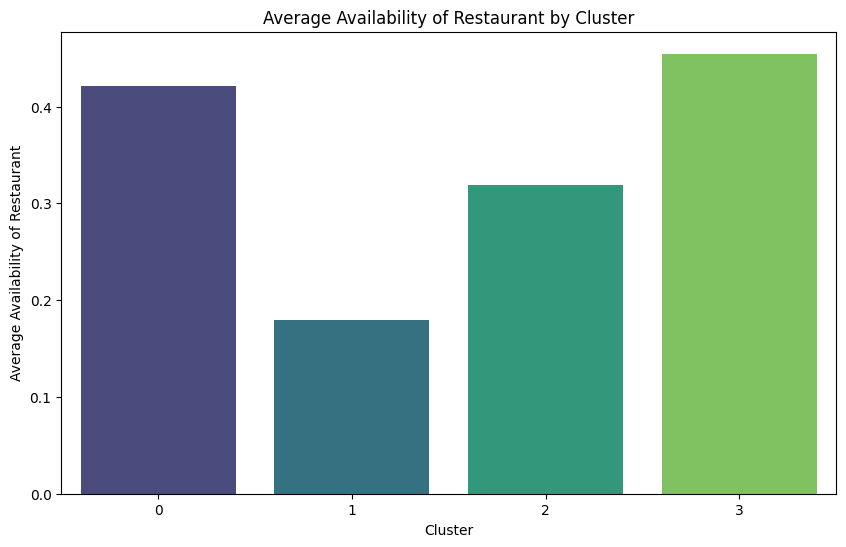

In [404]:
plt.figure(figsize=(10, 6))

# Calculate the average Business_Centre availability by Cluster
df_grouped = df.groupby('Cluster')['Restaurant'].mean().reset_index()

# Create a bar chart
sns.barplot(x='Cluster', y='Restaurant', data=df_grouped, palette='viridis')

# Customize the plot
plt.title('Average Availability of Restaurant by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Availability of Restaurant')
plt.show()

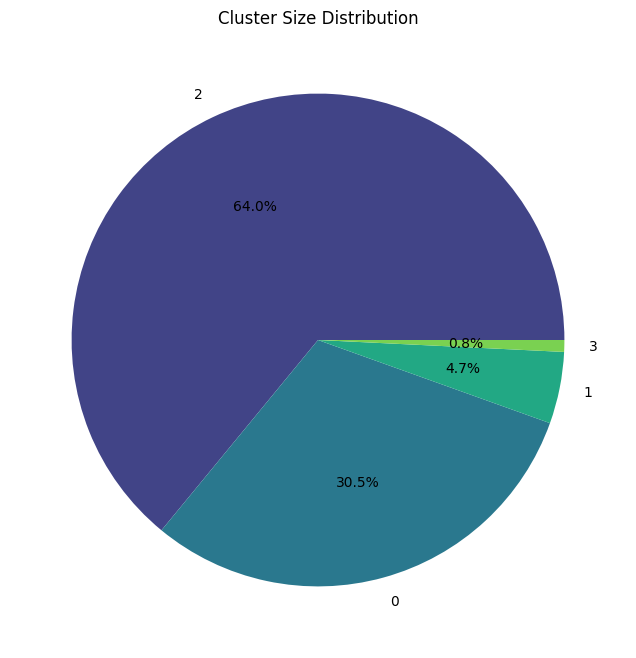

In [405]:
plt.figure(figsize=(8, 8))
df['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df['Cluster'].unique())))
plt.title('Cluster Size Distribution')
plt.ylabel('')
plt.show()

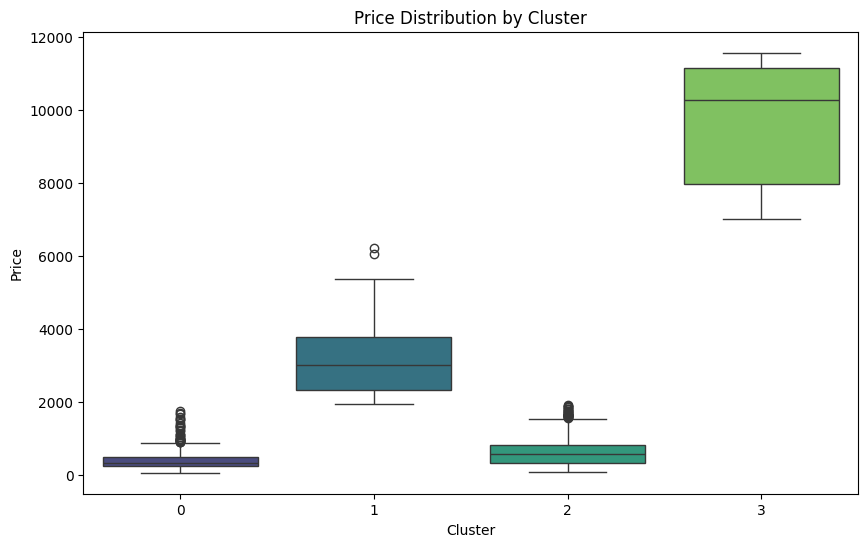

In [406]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Price', data=df, palette='viridis')
plt.title('Price Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()

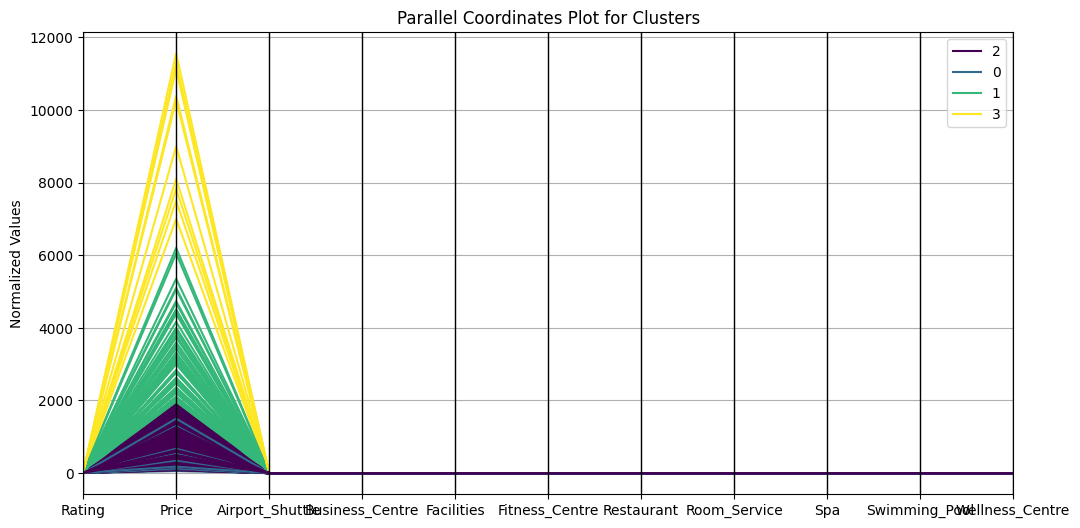

In [407]:
plt.figure(figsize=(12, 6))
parallel_coordinates(df[['Cluster', 'Rating', 'Price'] + amenities_columns], class_column='Cluster', colormap='viridis')
plt.title('Parallel Coordinates Plot for Clusters')
plt.ylabel('Normalized Values')
plt.show()

In [408]:
# plt.figure(figsize=(12, 6))
# df.groupby('Cluster')['Luxury_Score'].mean().plot(kind='bar', color='skyblue')
# plt.title('Average Luxury Score by Cluster')
# plt.ylabel('Average Luxury Score')
# plt.xlabel('Cluster')
# plt.show()

In [410]:
import joblib 
joblib.dump(kmeans, 'kmean.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']